## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Science da www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy


print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes_url = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'
filmes = pd.read_csv(filmes_url)
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas_url = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'
notas = pd.read_csv(notas_url)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby("filmeId").mean().nota

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
numero_de_notas = notas.groupby('filmeId').count().usuarioId

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = numero_de_notas
filmes = filmes.query('total_de_votos > 49')

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Média de votos dos filmes do MovieLens com mais de 50 votos')

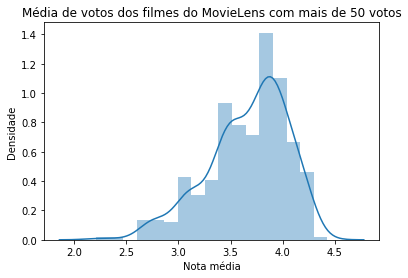

In [14]:
# solução histograma
ax = sns.distplot(filmes.nota_media)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos dos filmes do MovieLens com mais de 50 votos")

Text(0.5, 1.0, 'Média das notas dos filmes do MovieLens com mais de 50 votos')

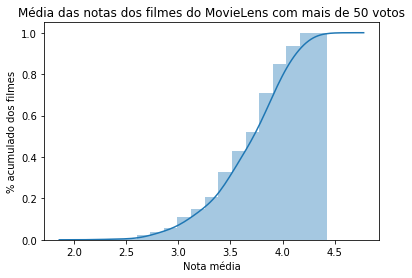

In [52]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulado dos filmes")
ax.set_title("Média das notas dos filmes do MovieLens com mais de 50 votos")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Total de votos dos filmes do MovieLens com mais de 50 votos')

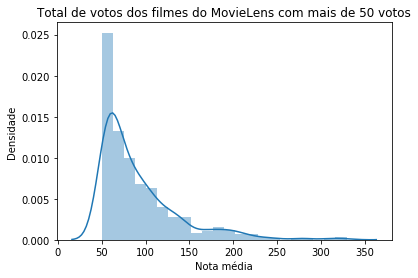

In [16]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Total de votos dos filmes do MovieLens com mais de 50 votos")

Text(0.5, 1.0, 'Total de votos dos filmes do MovieLens com mais de 50 votos')

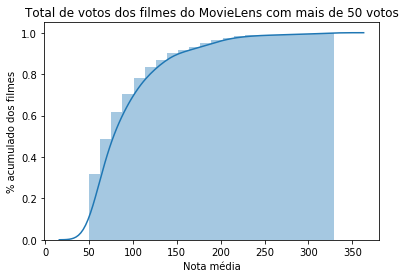

In [17]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulado dos filmes")
ax.set_title("Total de votos dos filmes do MovieLens com mais de 50 votos")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Total de filmes por gênero')

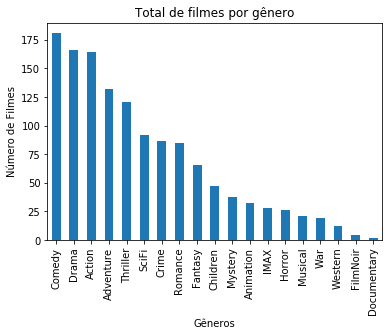

In [53]:
# solução
total_de_filmes_por_genero = generos.sum()
ax = total_de_filmes_por_genero.sort_values(ascending = False).plot(kind='bar')
ax.set(xlabel="Gêneros", ylabel="Número de Filmes")
ax.set_title("Total de filmes por gênero")

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = total_de_filmes_por_genero.sort_values(ascending = False)[:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
total_de_votos_por_filmes_por_genero = votos_por_genero.sum()
total_de_votos_por_filmes_por_genero = total_de_votos_por_filmes_por_genero.sort_values(ascending = False)

Text(0.5, 1.0, 'Total de votos por gênero')

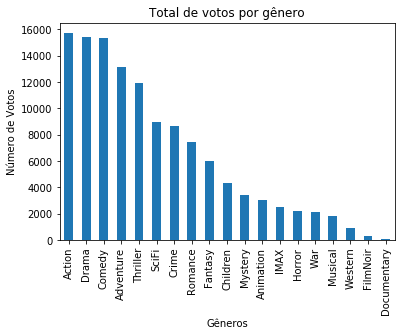

In [54]:
# solução
ax = total_de_votos_por_filmes_por_genero.plot(kind='bar')
ax.set(xlabel="Gêneros", ylabel="Número de Votos")
ax.set_title("Total de votos por gênero")

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
votos_por_filme_por_genero = total_de_votos_por_filmes_por_genero / total_de_filmes_por_genero 
votos_por_filme_por_genero = votos_por_filme_por_genero.sort_values(ascending = False)

numero_de_notas = notas.groupby('filmeId').count().usuarioId

Text(0.5, 1.0, 'Número médio de votos por gênero')

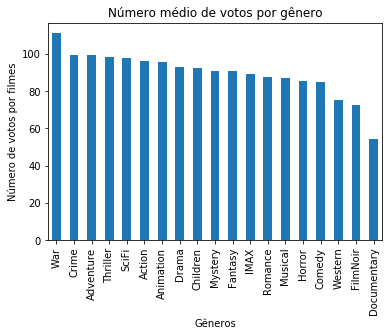

In [56]:
# solução com visualização 
ax = votos_por_filme_por_genero.plot(kind ='bar')
ax.set(xlabel="Gêneros", ylabel="Número de votos por filme")
ax.set_title('Número médio de votos por gênero')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    O gênero War não possuí muitos filmes, somente 19 constam na base de dados, no entanto esses filmes são muito populares e recebem muitos votos, o que não ocorre no gênero de ação em que são produzidos muitos filmes (164), o terceiro mais produzido da lista, mas recebem proporcionalmente menos votos por filme em comparação com outros gêneros como War e Crime. 

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuição do total de votos por filme de acordo com os gêneros')

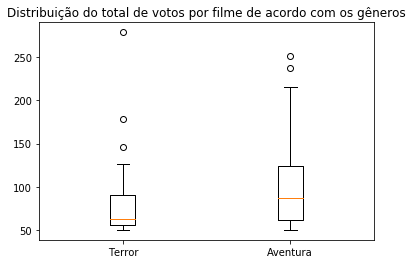

In [30]:
# solução:
import matplotlib.pyplot as plt
horror = filmes.query('Horror ==1') 
adventure = filmes.query('Adventure ==1') 
plt.boxplot([horror.total_de_votos, adventure.total_de_votos], labels = ["Terror", "Aventura"])
plt.title("Distribuição do total de votos por filme de acordo com os gêneros")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 1.0, 'Distribuição do total de votos por filme de acordo com os gêneros')

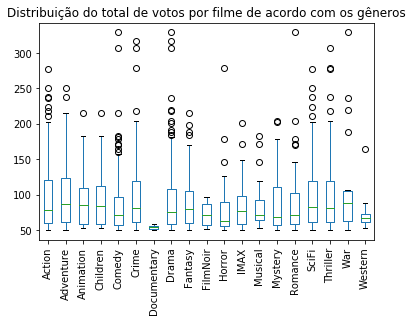

In [31]:
colunas = generos.columns
votos_por_genero[votos_por_genero[colunas] > 0].plot(kind='box')
plt.xticks(rotation=90)
plt.title("Distribuição do total de votos por filme de acordo com os gêneros")

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
   
O sucesso do filme pode ser medido pela sua popularidade, quando maior o número de pessoas que verem o filme, maior será sua bilheteria, deste modo, o gênero mais indicado é o de aventura, pois ele possui uma quantidade de votos muito superior possuindo mais de 14000 votos, enquanto que os filmes classificados como terror possuem um total inferior a 2000 votos. Outro indicativo de popularidade são os votos por filme, os filmes de aventura possuem em torno de 100 votos por filme, enquanto que os filmes de terror possuem um valor em torno de 80 votos por filme, de modo que é possível afirmar que o gênero de aventura é mais popular que o gênero de terror e portanto tem maior chance de trazer um faturamento maior.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição dos votos para o gênero de Aventura')

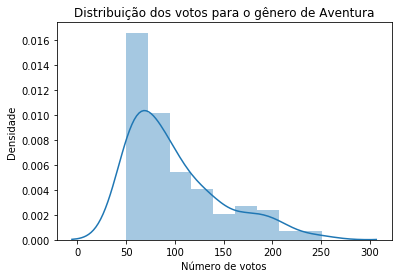

In [32]:
# solucao histograma de aventura
ax = sns.distplot(adventure.total_de_votos)
ax.set(xlabel="Número de votos", ylabel="Densidade")
ax.set_title("Distribuição dos votos para o gênero de Aventura")

Text(0.5, 1.0, 'Distribuição dos votos para o gênero de Terror')

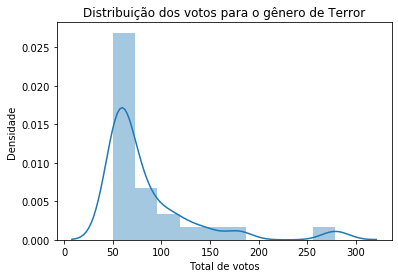

In [33]:
# solucao histograma de horror
ax = sns.distplot(horror.total_de_votos)
ax.set(xlabel="Total de votos", ylabel="Densidade")
ax.set_title("Distribuição dos votos para o gênero de Terror")

In [58]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
k2, p = scipy.stats.shapiro(adventure.total_de_votos)
alpha = .05
print("Valor de p = {:g} para o gênero aventura".format(p))

if p < alpha:
     print("A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal pode ser rejeitada, assim a distribuição do número de votos não segue uma distribuição normal")
else:
     print("A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal não pode ser rejeitada,assim a distribuição do número de votos segue uma distribuição normal")

k2, p = scipy.stats.shapiro(horror.nota_media)
alpha = .05
print("valor de p = {:g} para o gênero terror".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal pode ser rejeitada, assim a distribuição do número de votos não segue uma distribuição normal")
else:
     print("A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal não pode ser rejeitada, assim a distribuição do número de votos segue uma distribuição normal")


Valor de p = 2.15543e-09 para o gênero aventura
A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal pode ser rejeitada, assim a distribuição do número de votos não segue uma distribuição normal
valor de p = 0.0287265 para o gênero terror
A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal pode ser rejeitada, assim a distribuição do número de votos não segue uma distribuição normal


In [35]:
# solução com o teste desejado
print('Os resultados encontrados com o teste de normalidade de Shapiro-Wilk mostram que a distribuição do número de votos não segue uma distribuição normal, visto que a hipótese nula foi rejeitada em ambos os casos para volores de p < 0.05')

Os resultados encontrados com o teste de normalidade de Shapiro-Wilk mostram que a distribuição do número de votos não segue uma distribuição normal, visto que a hipótese nula foi rejeitada em ambos os casos para volores de p < 0.05


### Solução (explique sua conclusão):

Minha recomendação continua igual, os testes mostraram, que apesar da ambas as distribuições apresentarem assimetria, no geral os filmes de aventura recebem um número maior de votos. 

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição das notas por filme de acordo com os gêneros')

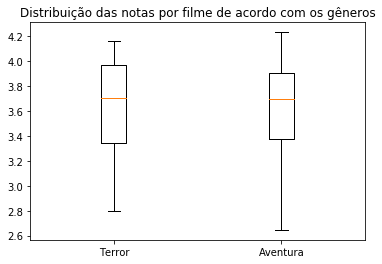

In [36]:
# solução:
plt.boxplot([horror.nota_media, adventure.nota_media], labels = ["Terror", "Aventura"])
plt.title("Distribuição das notas por filme de acordo com os gêneros")

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Recomendo o filme de terror, pois pelo boxplot os filmes desse gênero apresentam maior média em suas notas, assim como maior desvio padrão, assim há a maior possibilidade de que se lance um filme que obtenha notas mais elevadas. 

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição das notas para o gênero de Aventura')

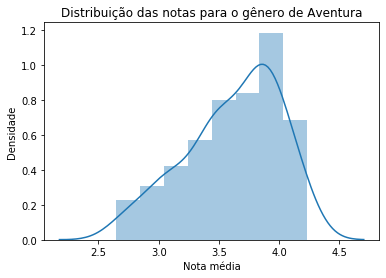

In [37]:
# solucao histograma de aventura
ax = sns.distplot(adventure.nota_media)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Distribuição das notas para o gênero de Aventura")

Text(0.5, 1.0, 'Distribuição das notas para o gênero de Terror')

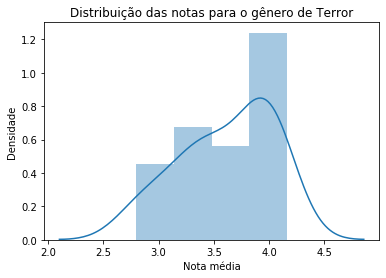

In [38]:
# solucao histograma de horror
ax = sns.distplot(horror.nota_media)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Distribuição das notas para o gênero de Terror")

In [59]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

k2, p = scipy.stats.shapiro(adventure.nota_media) 
alpha = .05
print("Valor de p = {:g} para o gênero aventura".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal pode ser rejeitada, assim a distribuição das notas não segue uma distribuição normal")
else:
     print("A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal não pode ser rejeitada,assim a distribuição das notas segue uma distribuição normal")


k2, p = scipy.stats.shapiro(horror.nota_media) 
alpha = .05
print("valor de p = {:g} para o gênero terror".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal pode ser rejeitada, assim a distribuição não segue uma distribuição normal")
else:
     print("A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal não pode ser rejeitada, assim a distribuição segue uma distribuição normal")
 


Valor de p = 0.000178582 para o gênero aventura
A hipotese nula de que a distribuição de notas do gênero aventura segue uma distribuição normal pode ser rejeitada, assim a distribuição das notas não segue uma distribuição normal
valor de p = 0.0287265 para o gênero terror
A hipotese nula de que a distribuição de notas do gênero terror segue uma distribuição normal pode ser rejeitada, assim a distribuição não segue uma distribuição normal


In [40]:
# solução com o teste desejado
print('Os resultados encontrados com o teste de normalidade de Shapiro-Wilk mostram que a distribuição do número de votos não segue uma distribuição normal, visto que a hipótese nula foi rejeitada em ambos os casos para volores de p < 0.05')

Os resultados encontrados com o teste de normalidade de Shapiro-Wilk mostram que a distribuição do número de votos não segue uma distribuição normal, visto que a hipótese nula foi rejeitada em ambos os casos para volores de p < 0.05


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Sim, o histograma mostrou que os filmes de terror possuem um desvio-padrão maior, apresentando uma maior assimetria à esquerda, indicando a maior possibilidade de obtenção de notas maiores

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Escolheria o gênero de Terror (Horror), pois apresenta uma distribuição mais elevada em relação as notas e apresenta uma popularidade mediana, de modo que o resultado não seja tão afetado.  


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero



,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
5,132.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0
6,0.0,0.0,0.0,0.0,70.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,82.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# solução: calculando os 2 generos mais votados
total_de_votos_por_filmes_por_genero = votos_por_genero.sum()
total_de_votos_por_filmes_por_genero = total_de_votos_por_filmes_por_genero.sort_values(ascending = False)
dois_generos_mais_assistidos = total_de_votos_por_filmes_por_genero[:2]
dois_generos_mais_assistidos

Action    15734.0
Drama     15445.0
dtype: float64

In [61]:
# solução: encontrando os top 5 filmes desses generos
action = filmes.query('Action ==1') 
action = action.sort_values(ascending = False, by = 'nota_media')
print(action.titulo[:5])

drama = filmes.query('Drama ==1') 
drama = drama.sort_values(ascending = False, by = 'nota_media')
print(drama.titulo[:5])


filmeId
2959                             Fight Club (1999)
58559                      Dark Knight, The (2008)
1197                    Princess Bride, The (1987)
260      Star Wars: Episode IV - A New Hope (1977)
1208                         Apocalypse Now (1979)
Name: titulo, dtype: object
filmeId
318     Shawshank Redemption, The (1994)
858                Godfather, The (1972)
2959                   Fight Club (1999)
1276               Cool Hand Luke (1967)
1221      Godfather: Part II, The (1974)
Name: titulo, dtype: object


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solucao
correlacao = filmes.corr()
correlacao = correlacao.loc[colunas].sort_values(ascending = False, by = 'nota_media')
duas_maiores_correlacao = correlacao.nota_media[0:2]
duas_menores_correlacao = correlacao.nota_media[-2:]
print('Os dois gêneros que possuem maior correlação com a nota média são {} e {}'.format(duas_maiores_correlacao.index[0], duas_maiores_correlacao.index[1]))
print('Os dois gêneros que possuem menor correlação com a nota média são {} e {}'.format(duas_menores_correlacao.index[0], duas_menores_correlacao.index[1]))



Os dois gêneros que possuem maior correlação com a nota média são Drama e Crime
Os dois gêneros que possuem menor correlação com a nota média são Action e Comedy


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [45]:
# solucao
correlacao = filmes.corr()
correlacao = correlacao.loc[colunas].sort_values(ascending = False, by = 'total_de_votos')
duas_maiores_correlacao2 = correlacao.total_de_votos[0:2]
duas_menores_correlacao2 = correlacao.total_de_votos[-2:]
print('Os dois gêneros que possuem maior correlação com o total de votos são {} e {}'.format(duas_maiores_correlacao2.index[0], duas_maiores_correlacao2.index[1]))
print('Os dois gêneros que possuem menor correlação com a total de votos são {} e {}'.format(duas_menores_correlacao2.index[0], duas_menores_correlacao2.index[1]))



Os dois gêneros que possuem maior correlação com o total de votos são Adventure e War
Os dois gêneros que possuem menor correlação com a total de votos são Western e Comedy


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

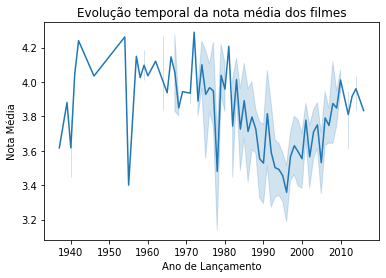

In [62]:
# solucao
ax = sns.lineplot(x='ano_de_lancamento', y='nota_media', data= filmes) 
ax.set(xlabel='Ano de Lançamento', ylabel='Nota Média')
ax.set_title("Evolução temporal da nota média dos filmes")
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)
correlacao = filmes.corr()
correlacao = correlacao.loc['ano_de_lancamento']['nota_media']
print('A correlação entre o ano de lançamento e a nota média é de {}'.format(correlacao))

A correlação entre o ano de lançamento e a nota média é de -0.1591455520444448


### Solução (explicação)
A correlação negativa entre a nota média dos filmes e o ano de lançamento pode ser explicada pelo aumento no número de filmes no banco de dados conforme o tempo. Pois filmes lançados antes do início do site tem maior possibilidade de serem filmes clássicos, em que filmes de má qualidade não sobreviveram a passagem do tempo, não possuindo assim, registro no banco de dados. Dessa maneira a correlação pode não ser verdadeira, dado esse problema na construção do banco de dados.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

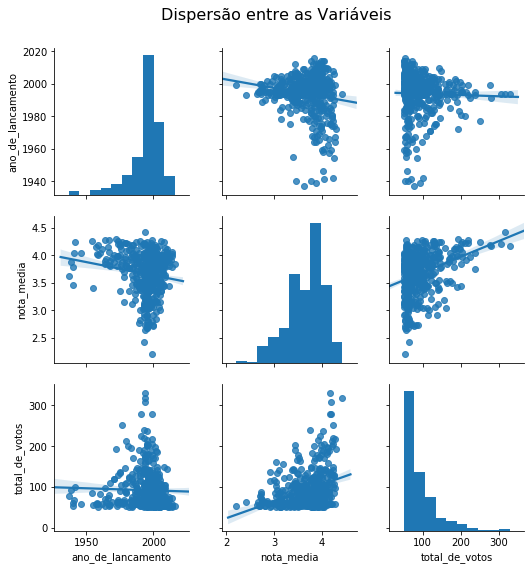

In [64]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(infos, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=16, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

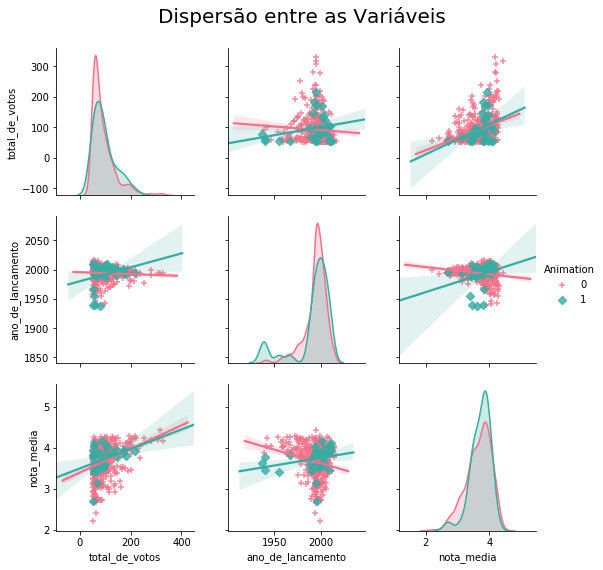

In [49]:
ax = sns.pairplot(filmes, hue='Animation', palette = 'husl', markers=['+','D'], vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

1 - A nota média dos filmes de animação vem crescendo ao longo do tempo, no entanto essa relação não aparenta ser linear, pois há uma concentração maior na faixa de notas entre 3 e 4 que não apresenta uma relação tão clara entre ano de lançamento e nota.

2 - Também existe uma correlação positiva entre as variáveis, entretanto a linearidade não é evidenciada pela gráfico, com os filmes de animação, que apresentam o maior número de votos, não sendo aqueles lançados nos últimos anos.

3 - A correlação entre o total de votos e a nota média é positiva para ambas as categorias de filmes e com uma linearidade mais clara, o que pode estar relacionado ao fato de um filme ser bom e com isso ser mais popular e receber assim um maior número de votos, no entanto essa causalidade não pode ser afirmada sem que se avaliem outros fatores. Em relação aos demais filmes, observa-se uma relação negativa entre as variáveis ao contrário do que foi apresentado pelos filmes de animação, em que tanto a nota média, quanto o total de votos possuem relação positiva com o ano de lançamento.

4 - Uma hipótese para esse resultado, é que filmes de animação tem-se tornado mais populares nos últimos anos e com isso tem recebido um número maior de votos. Assim como do uso da animação como forma de arte que passa a tratar de temas mais adultos, e com nuanses que atraiam tanto o público adulto como o infantil, como nos filmes de animação da Pixar, que além de serem muito populares com o público em geral conseguem também um bom sucesso com a crítica.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

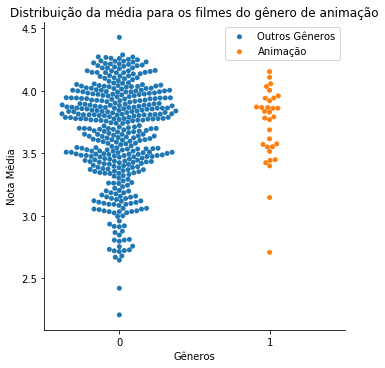

In [50]:
# solução
sns.catplot(x='Animation', y='nota_media', kind="swarm", data=filmes)
plt.title("Distribuição da média para os filmes do gênero de animação")
plt.xlabel('Gêneros')
plt.ylabel('Nota Média')
plt.legend(['Outros Gêneros', 'Animação'])
ax


#### Explicação do gráfico

A visualização do tipo violino com o seaborn, mostra a distribuição dos dados em vários níveis e permite a comparação entre diferentes distribuições. Assim é possível mostrar de maneira mais eficiente várias distribuições de dados ao mesmo tempo. Nesse gráfico observa-se como os filmes de animação se concentram mais próximo a nota 4 e possuem menor variância, com um número menor de outliers na amostra. 

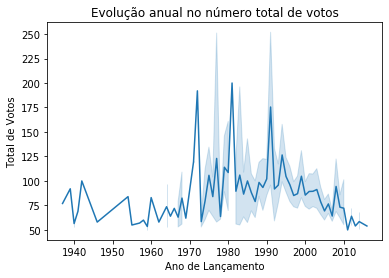

In [51]:
ax = sns.lineplot(x='ano_de_lancamento', y='total_de_votos', data=filmes)
plt.title("Evolução anual no número total de votos")
plt.xlabel('Ano de Lançamento')
plt.ylabel('Total de Votos')
ax


##### Explicação do gráfico

O gráfico da evolução temporal do número dos votos permite elucidar uma questão levantado ao longo das questões a respeito da ligação do aumento do número dos votos e seu impacto sobre a redução das notas ao longo do tempo, pelo gráfico não é possível confirmar essa hipótese, umas vez que nos últimos anos da base de dados a diferença entre o número total de votos entre os filmes atuais e antigos é quase inexistente. 